In [1]:
import paddle
print(paddle.__version__)

2.6.1


In [2]:
import numpy
print(numpy.__version__)

1.21.6


[2024/07/07 13:37:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

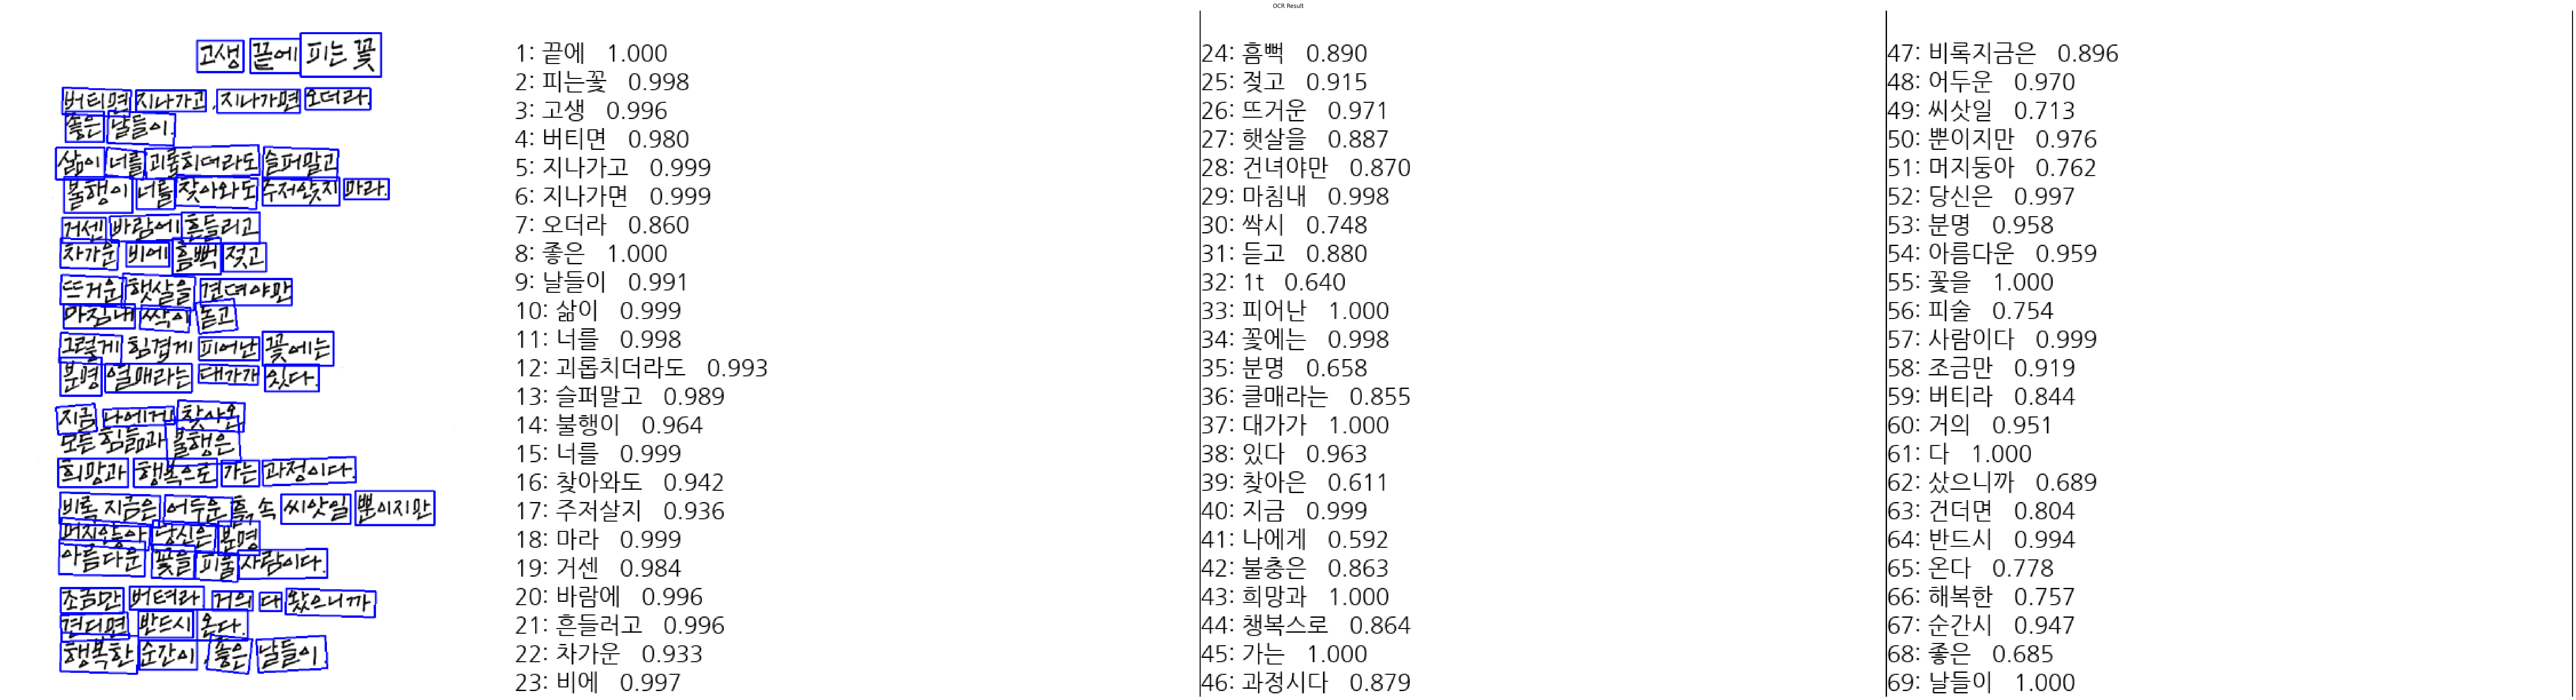

In [6]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt

# PaddleOCR 모델 초기화 (CPU 모드)
ocr = PaddleOCR(use_angle_cls=True, lang='korean', use_gpu=False)

# 이미지 파일 경로
image_path = 'ts_png.png'

# OCR 수행
result = ocr.ocr(image_path, cls=True)

# 결과 출력
for line in result:
    print(line)

# 결과 시각화
image = cv2.imread(image_path)
boxes = [res[0] for res in result[0]]
txts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

# 이미지에 OCR 결과 그리기
image = draw_ocr(image, boxes, txts, scores, font_path='NanumGothic.ttf')

# 결과 이미지 표시
plt.figure(figsize=(100, 100))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


[2024/07/07 13:50:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

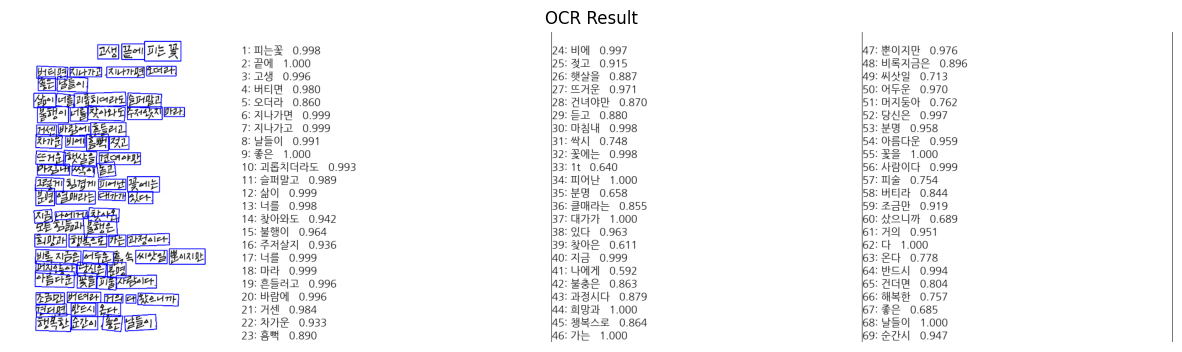

In [3]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt

# PaddleOCR 모델 초기화 (CPU 모드)
ocr = PaddleOCR(use_angle_cls=True, lang='korean', use_gpu=False)

# 이미지 파일 경로
image_path = 'ts_png.png'

# OCR 수행
result = ocr.ocr(image_path, cls=True)

# 결과를 y좌표와 x좌표 기준으로 정렬하는 함수
def sort_by_coordinates(result):
    # y 좌표를 기준으로 정렬하되, 같은 y 좌표일 때는 x 좌표 기준으로 정렬
    return sorted(result, key=lambda x: (min(p[1] for p in x[0]), min(p[0] for p in x[0])))

# 결과 정렬
sorted_result = sort_by_coordinates(result[0])

# 결과 출력
for line in sorted_result:
    print(line)

# 결과 시각화
image = cv2.imread(image_path)
boxes = [res[0] for res in sorted_result]
txts = [res[1][0] for res in sorted_result]
scores = [res[1][1] for res in sorted_result]

# 이미지에 OCR 결과 그리기
image = draw_ocr(image, boxes, txts, scores, font_path='NanumGothic.ttf')

# 결과 이미지 표시
plt.figure(figsize=(15, 15))  # 여기서 figsize를 조정하여 이미지 크기를 변경합니다
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()
